# 🛒 Big Mart Sales Prediction - Mini ML Project

Welcome to the **Big Mart Sales Prediction** project!  
In this notebook, we'll build a simple machine learning system that predicts the sales of products at various Big Mart outlets using historical sales data.

## 📌 Objective
The main goal of this mini-project is to develop a regression model that can estimate sales figures for different products based on features like item type, outlet size, visibility, and more.

## 🧠 Learning Outcomes
- Data preprocessing and feature engineering
- Exploratory Data Analysis (EDA)
- Building and evaluating regression model (XGBRegressor)

## 📂 Dataset
We are using the [BigMart Sales dataset](https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data) available on Kaggle. It contains:

- **Train.csv**: Historical sales data for various products across multiple outlets
- **Test.csv**: Product and outlet information for which sales predictions are to be made

**Train.csv** file is included in the `ML Datasets/` folder of this repository for easy access and reproducibility.  
You can also download the original dataset directly from Kaggle using the link above.

---

Let's get started! 🚀


# Importing the Dependencies

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics


# Data Collection and Analysis

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# loading the dataset from csv file to a Pandas DF
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML Datasets/Big_Mart_Sales_Prediction.csv')
# df = pd.read_csv('/ML Datasets/Big_Mart_Sales_Prediction.csv')


In [93]:
# First 5 Rows of the df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
# Getting some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [95]:
# number of data points and number of features
df.shape

(8523, 12)

**Categorical Features:**
- Item_Identifer
- Item_Fat_Content
- Outlet_Identifer
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [96]:
# checking for missing values
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


# Handling Missing Values


In [97]:
# Mean Value of Item_Weight column
df['Item_Weight'].mean()

np.float64(12.857645184135976)

In [98]:
# Filling the missing values in item weight column with mean value
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [99]:
# checking for missing values
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


## Replacing the missing values in Outlet_Size column with mode

In [100]:
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [102]:
miss_values = df['Outlet_Size'].isnull()

In [103]:
miss_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [104]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [105]:
# checking for missing values
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# Data Analysis

In [106]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Numerical Features

In [38]:
sns.set()

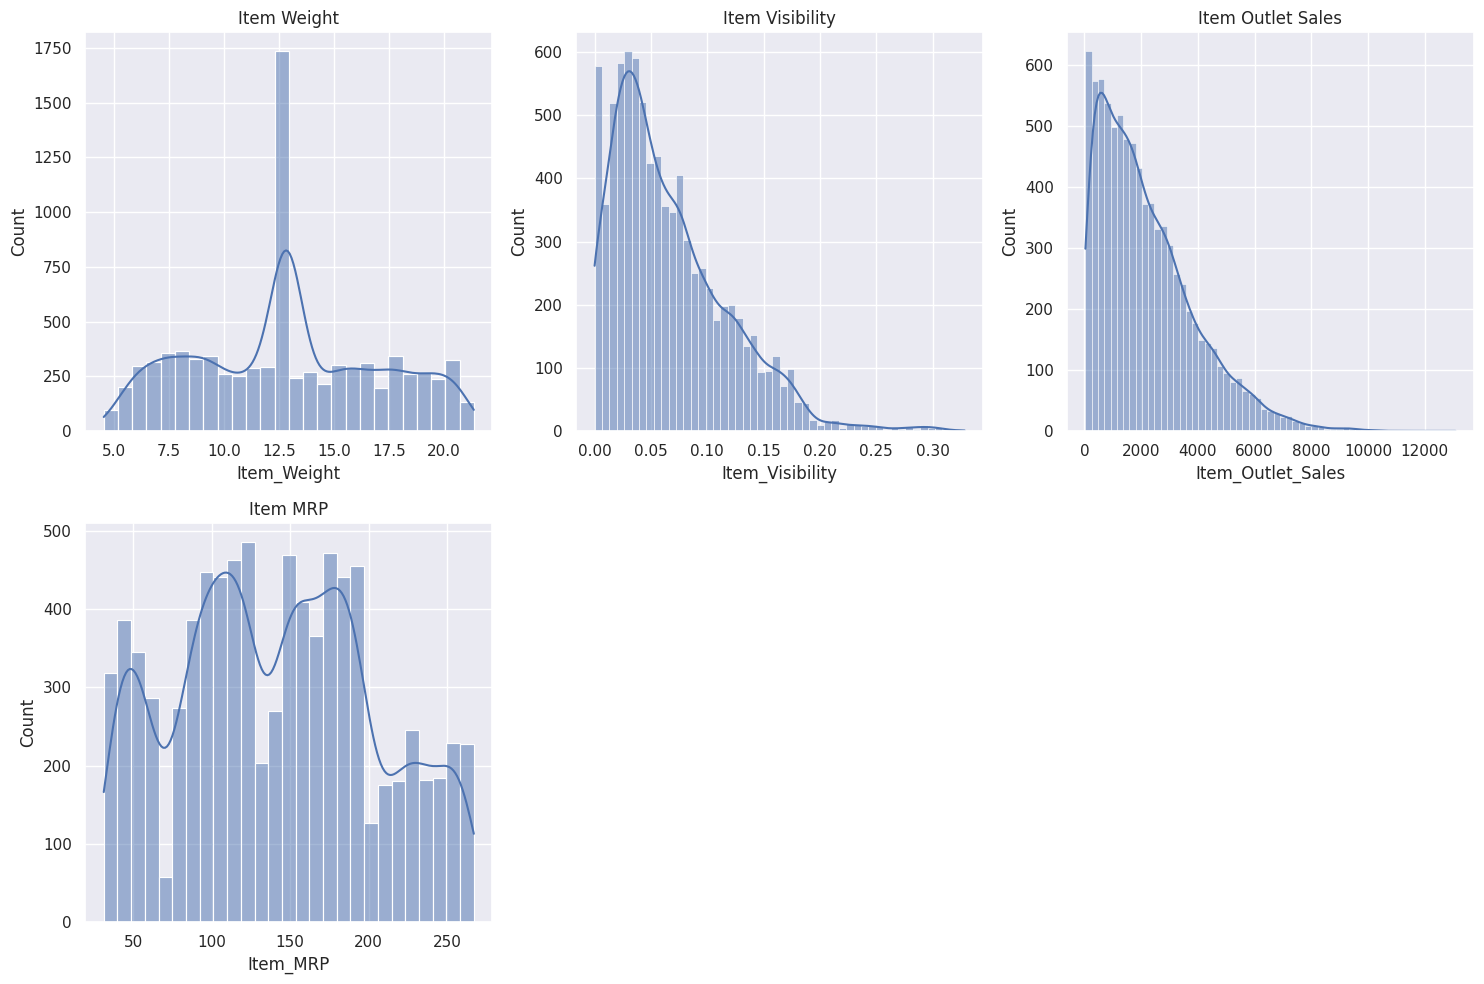

In [46]:
plt.figure(figsize=(15, 10))

# Plot 1
# Item_Weight distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Item_Weight'], kde=True)
plt.title('Item Weight')

# Plot 2
# Item_Visibility distribution
plt.subplot(2, 3, 2)
sns.histplot(df['Item_Visibility'], kde=True)
plt.title('Item Visibility')

# Plot 3
# Item_Outlet_Sales distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Item Outlet Sales')

# Plot 4
# Item_MRP distribution
plt.subplot(2, 3, 4)
sns.histplot(df['Item_MRP'], kde=True)
plt.title('Item MRP')

plt.tight_layout()
plt.show()

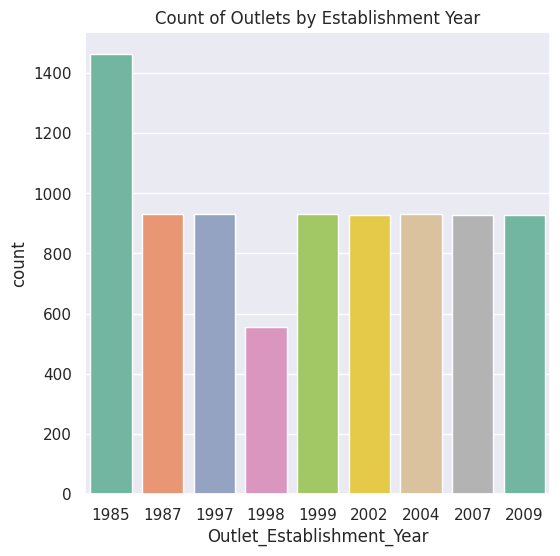

In [53]:
# Outlet_Establishment_Year Column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', palette='Set2', hue='Outlet_Establishment_Year', legend=False, data=df)
plt.title('Count of Outlets by Establishment Year')
plt.show()

## Categorical Features

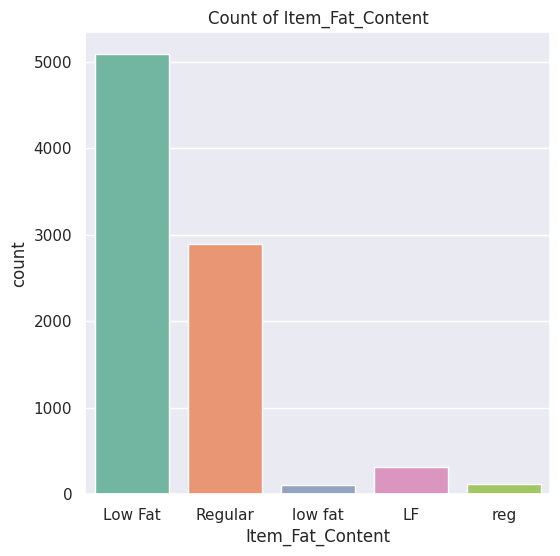

In [67]:
plt.figure(figsize=(6,6))
# Item_Fat_Content Column
sns.countplot(x='Item_Fat_Content', palette='Set2', hue='Item_Fat_Content', legend=False, data=df)
plt.title('Count of Item_Fat_Content')
plt.show()

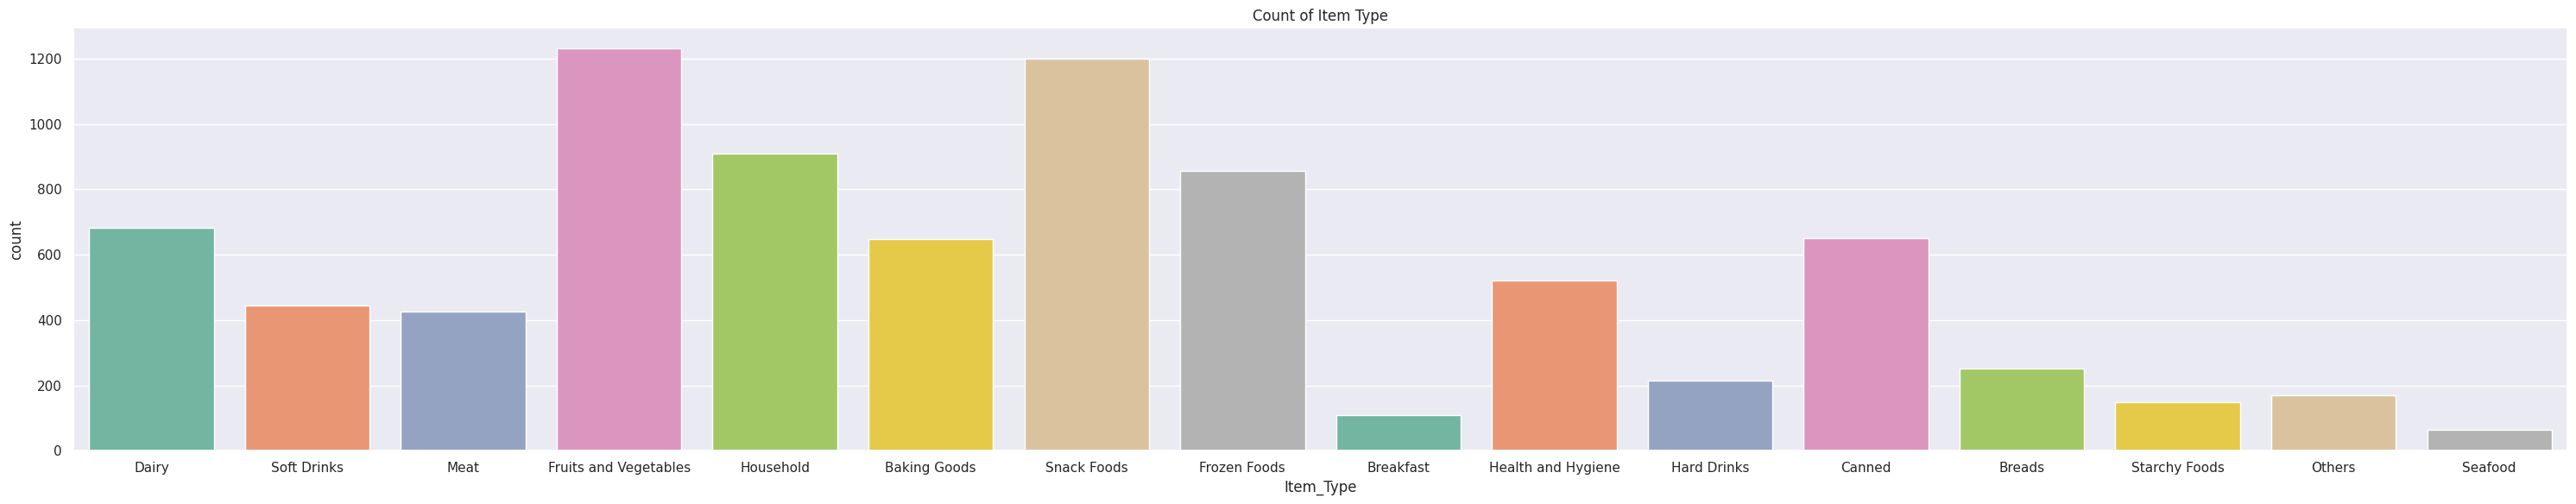

In [65]:
# Item_Type Column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', palette='Set2', hue='Item_Type', legend=False, data=df)
plt.title('Count of Item Type')
plt.tight_layout()
plt.show()

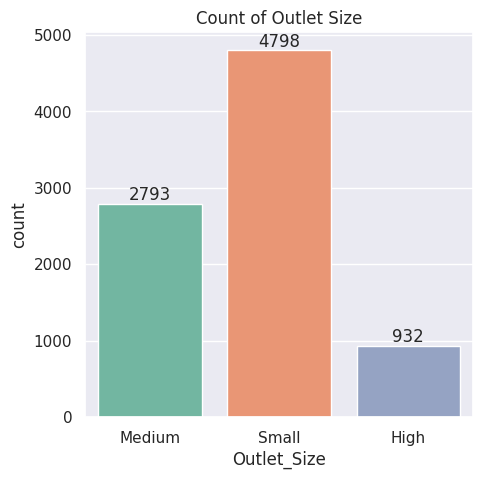

In [109]:
# Outlet_Size Column
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Outlet_Size', palette='Set2', hue='Outlet_Size', data=df)
plt.title('Count of Outlet Size')

# Add count labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Data Pre-Processing

In [111]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [112]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [118]:
df = df.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}})

In [119]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


## Label Encoding

In [121]:
encoder = LabelEncoder()


In [125]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])


In [126]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Splitting the features and targets

In [127]:
X,Y = df.drop(columns='Item_Outlet_Sales', axis=1), df['Item_Outlet_Sales']

In [129]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting the data into training and testing data

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [133]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Training  
**XGBoost Regressor**

In [134]:
regressor = XGBRegressor()

In [135]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluation

In [136]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [137]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
r2_train

0.8762174618111388

In [138]:
# Prediction on Test data
test_data_prediction = regressor.predict(X_test)

In [141]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
r2_test

0.5017253991620692

In [142]:
!